# I. Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

> Nama : Dzikri Furqoni Arief

> Batch : FTDS-018-RMT

> Task : Milestone 2

> Dataset : `Bank Customers Churn` yang didapat dari kaggle (https://www.kaggle.com/datasets/santoshd3/bank-customers)

> Dataset Information:

- CustomerId : Identification number
- Surname : Customer Last name
- CreditScore : Customers credit score
- Balance : Amount in account
- NumOfProducts : Number of active different functionalities with bank like programs ,bonds,insurance etc.
- HasCrCard : Have credit card (0 = No , 1 = Yes)
- IsActiveMember : active with different functionalities with bank like programs ,bonds,insurance etc. (0 = No , 1 = Yes)
- EstimatedSalary : salary estimated by bank
- Exited : withdrawal from bank (0 = No , 1 = Yes)

> Latar Belakang :

Bank Indo Sedang Memiliki kekhawatiran akan menurunya profit mereka diakibatkan oleh costumer yang churn, Maka dari itu Bank Indo Menghire data Scientiest Untuk membuat project Machin learning yang dapat melakukan prediksi apakah nasabah akan churn atau tidak, sehingga mereka bisa memberikan treatment yang berbeda pada nasabah yang di prediksi akan bertahan dan pada nasabah yang akan Churn.

> Objective :

- Membuat Model Machine learning Klasifikasi, untuk memprediksi Costumer Churn atau bertahan.
- Algoritma yang akan digunakan adalah Logistic Regression, Decision Tree, Random Forest dan K-Nearest Neighbor, Yang akan dibandingkan yang terbaik berdasarkan nilai Mean Recall cross validation.
- Kemudian yang terbaik dari ke 4 model Akan dilakukan Hyperparamter tuning untuk mencoba mengimprove modelnya, Kemudian Model yang sudah di tuning akan dibandingkan dengan base modelnya, Kemudian di analisa untuk mencari yang terbaik.

> Fokus :

- Pada kasus ini fokus kita adalah untuk menekan False Negatif atau Nasabah yang diprediksi akan bertahan tetapi kenyataanya akan Churn, karena akan sangat fatal akibatnya untuk perusahaan, dapat membuat perusahaan kehilangan costumernya.
- Oleh karena itu metriks evaluasi yang akan kita gunakan ada Recall Score.

# II. Import Library

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [230]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from feature_engine.outliers import Winsorizer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import pickle
import json


Berikut adalah daftar library yang digunakan pada project ini.

# III. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [149]:
# Load Dataset

df = pd.read_csv("C:/Users/Nani Muksin/Downloads/New folder (9)/Churn Modeling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


melakukan load dan pemanggilan untuk dafaframe

In [150]:
# memanggil head dari df
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Memanggil preview dari 5 baris data teratas dari dataframe

In [151]:
# memanggil tail dari df
df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Memanggil preview dari 5 baris terbawah dari dataframe

In [152]:
# Mengecek Informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Diketahui dari informasi di atas terdapat 14 kolom dengan 10000 baris data di dalam dataframe.

In [153]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Dapat kita lihat dari data di atas untuk kolom *'CreditScore'* nilai minimumnya adalah 350 dan maksimumnya adalah 850, Untuk kolom *'Age'* Nilai minimumnya adalah 18 dan nilai maksimumnya adalah 92.

In [154]:
dfc=df.copy()

Melakukan penyalinan pada dataframe agar dataframe asli tetap dalam kondisi original.

# IV. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

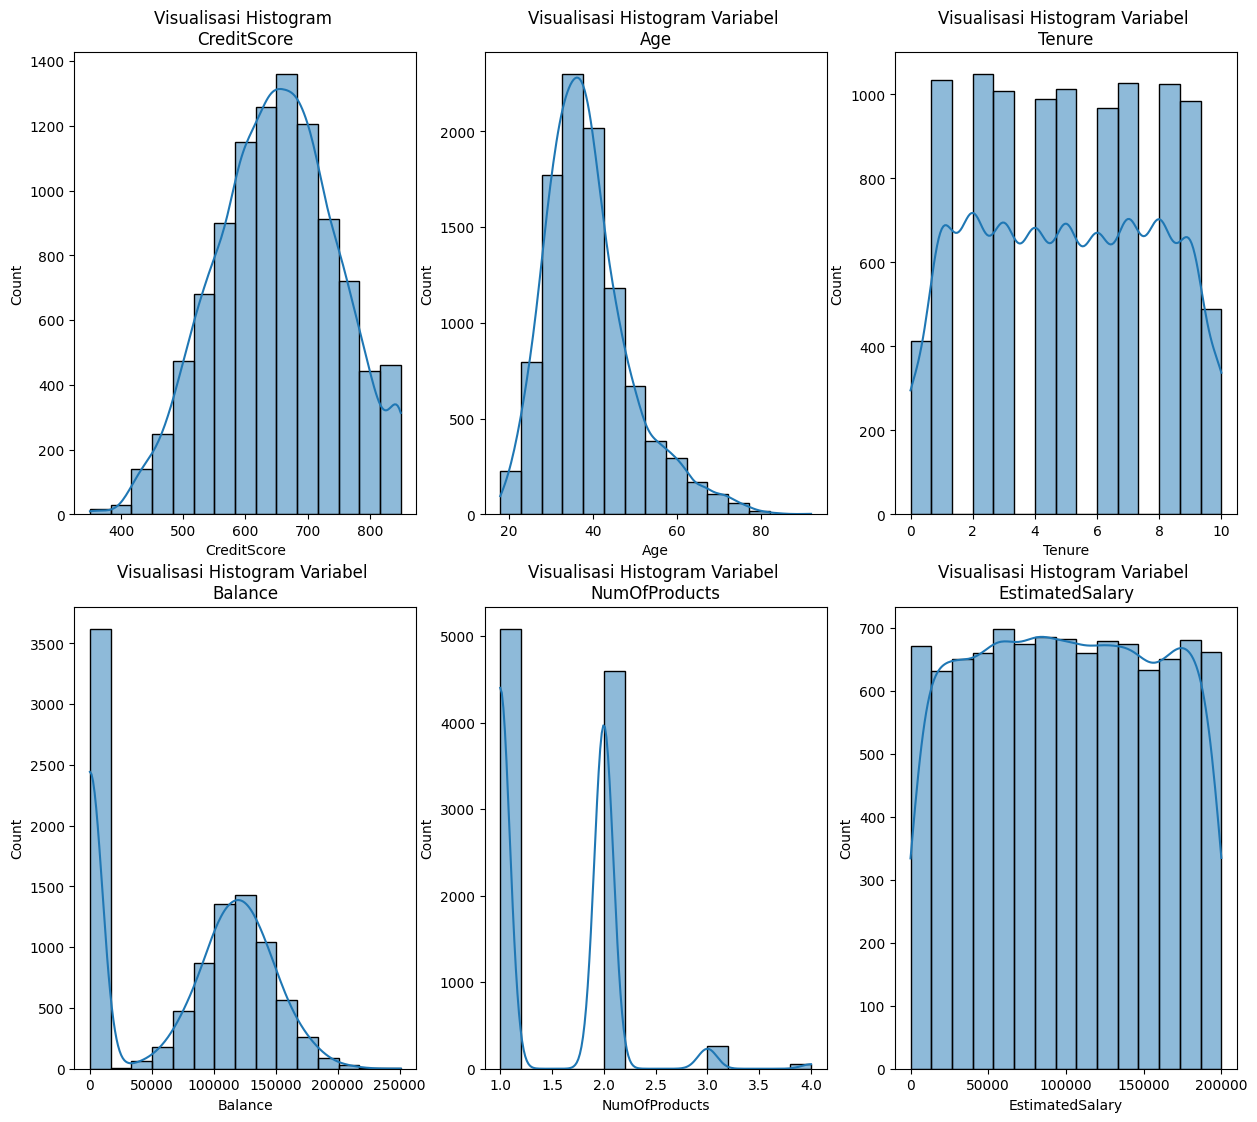

In [155]:
plt.figure(figsize=(15,42))

plt.subplot(6, 3, 1)
sns.histplot(df['CreditScore'], bins=15, kde=True)
plt.title('Visualisasi Histogram \nCreditScore')

plt.subplot(6, 3, 2)
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nAge')

plt.subplot(6, 3, 3)
sns.histplot(df['Tenure'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nTenure')

plt.subplot(6, 3, 4)
sns.histplot(df['Balance'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nBalance')

plt.subplot(6, 3, 5)
sns.histplot(df['NumOfProducts'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nNumOfProducts')

plt.subplot(6, 3, 6)
sns.histplot(df['EstimatedSalary'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nEstimatedSalary')

plt.show()

Berdasarkan visualisasi di atas dapat kita lihat grafik untuk skew Dan distribusi datanya, Dapat kita lihat hanya kolom *"EstimatedSalary"* dan kolom *"Tenure"* yang terdistribusi dengan normal, sedangkan untuk 4 kolom lainya yaitu *"CreditScore"*, *"Age"*, *"Balance"*, *"NumOfProducts"* Tidak terdistribusi dengan normal dan Menujukan datanya Skew.

<Axes: xlabel='IsActiveMember', ylabel='count'>

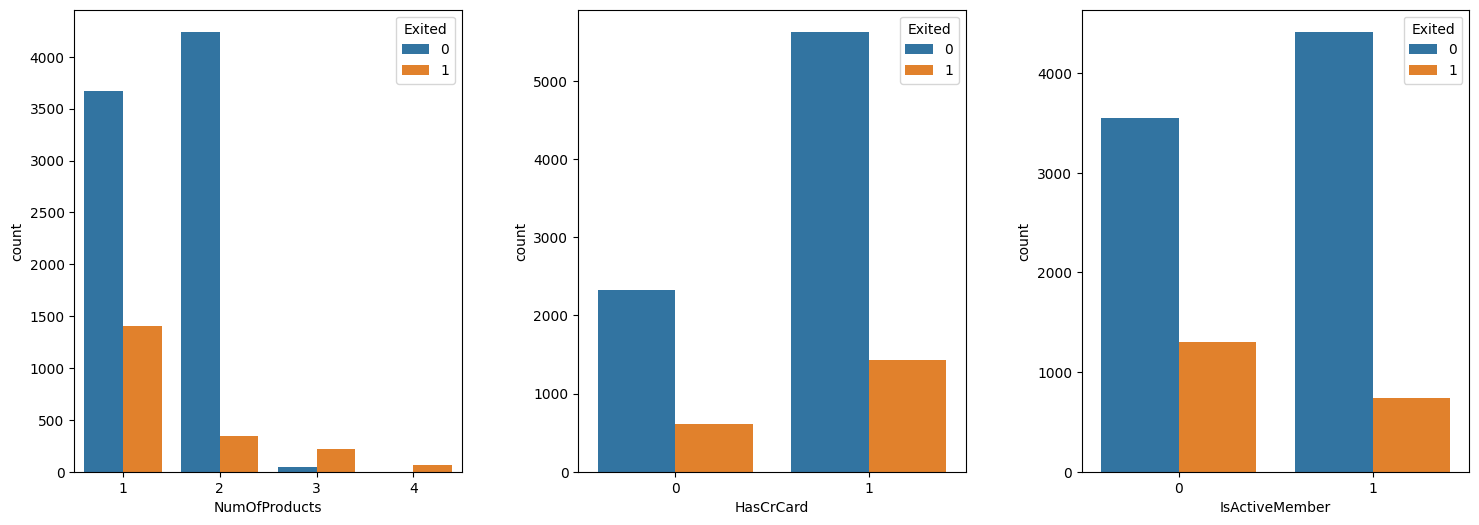

In [156]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2])

Dari Visualisasi di atas kita dapatkan infromasi bahwa Semakin sedikit Produk yang diikuti oleh nasabah maka kecenderungan untuk Churn nya semakin tinggi. Kemudian Untuk Nasabah yang memiliki kredit card memiliki kecenderungan Untuk Churn Dibanding nasabah yang tidak memiliki credit Card. Kemudian dapat kita lihat juga Untuk nasabah yang merupakan aktif member memiliki kemungkinan untuk Churn yang lebih kecil dibanding nasabah yang bukan merupakan aktif member. Maka dapat disimpulkan untuk Nasabah yang merupakan member aktif product dari bank memiliki kecenderungan untuk churn Lebih kecil dibanding yang bukan member program dari bank, dan semakin banyak product program dari bank yg diikuti oleh nasabah semakin memperkecil kemungkinan nasabah untuk Churn.

<Axes: xlabel='Age', ylabel='Balance'>

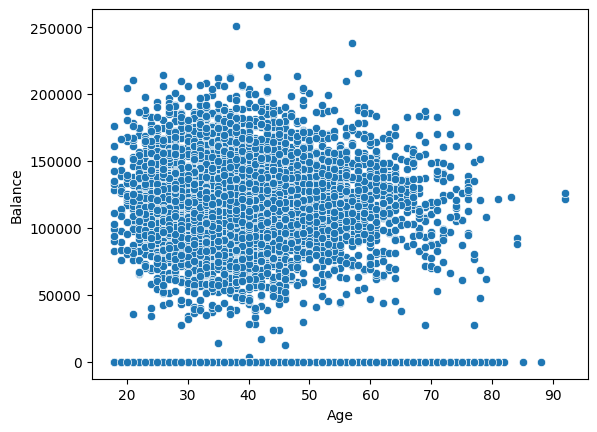

In [157]:
# Melakukan visualisasi hubungan Age terhadap Balance
sns.scatterplot(x=df['Age'], y=df['Balance'])

Dari visualisasi di atas dapat kita lihat persebaran data untuk umur terhadap balance, Maka dapat kita lihat bahwa untuk Balance dari balance min 0 sampai di kisaran 200000 tersebar pada seluruh usia, dan untuk balance max sendiri 250000 ada pada nasabah dengan usia sekitar 38 Tahun. Maka dari hasil analisa di atas dapat kita lihat bahwa usia tidak mempengaruhi Balance dari Credit card nasabah tersebut.

<Axes: xlabel='Balance', ylabel='EstimatedSalary'>

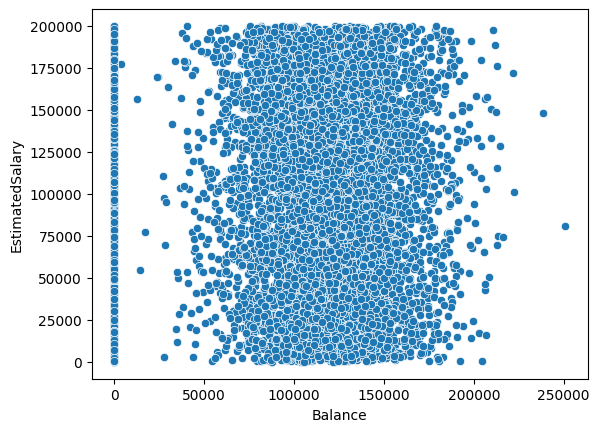

In [158]:
# Melakukan visualisasi hubungan Age terhadap Balance
sns.scatterplot(x=df['Balance'], y=df['EstimatedSalary'])

Dari visualisasi di atas dapat kita lihat persebaran data untuk umur terhadap balance, Maka dapat kita lihat bahwa untuk Balance dari balance min 0 sampai di kisaran 200000 tersebar pada seluruh usia, dan untuk balance max sendiri 250000 ada pada nasabah dengan usia sekitar 38 Tahun. Maka dari hasil analisa di atas dapat kita lihat bahwa usia tidak mempengaruhi Balance dari Credit card nasabah tersebut.

Geography
Spain       99440.572281
France      99899.180814
Germany    101113.435102
Name: EstimatedSalary, dtype: float64


Text(0.5, 1.0, 'Geography to EstimatedSalary Mean')

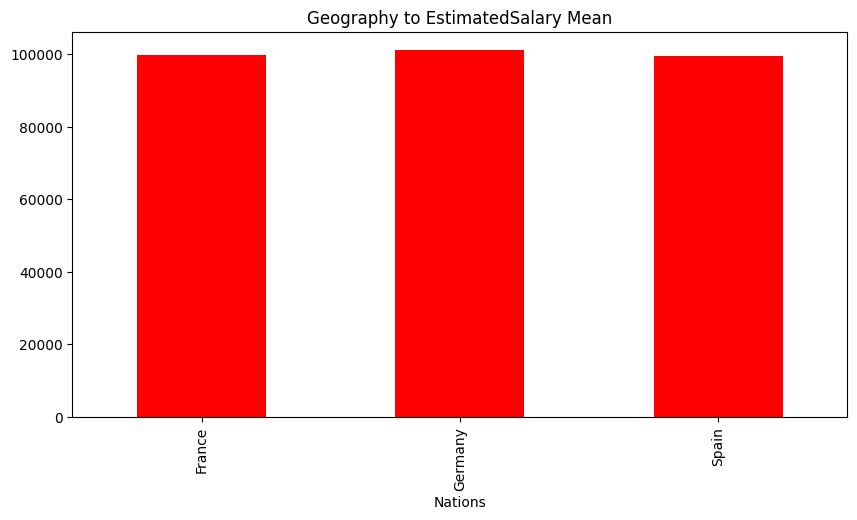

In [159]:
negara = dfc.groupby(by="Geography",sort=True)["EstimatedSalary"].mean()
print(negara.sort_values())

negara.plot(kind='bar', figsize=(10, 5), color='Red')
plt.xlabel('Nations')
plt.title('Geography to EstimatedSalary Mean')

Dapat kita lihat dari data dan visualisasi di atas, Untuk data Geography terhadap EstimatedSalary, diketahui jenis Negara Germany memiliki rata-rata EstimatedSalary tertinggi yaitu 101113 lebih besar dari negara France yg nilainya 99899, dan negera Spain yg nilainya 99440. Untuk perbedaan nilai rata-ratanya tidak terlalu jauh antara France dan Spain juga German. Maka dapat disimpulkan dari ketiga negara tersebut setara dalam estimated salary rata-ratanya.

Exited (0 = No, 1 = Yes): 
 0    7963
1    2037
Name: Exited, dtype: int64


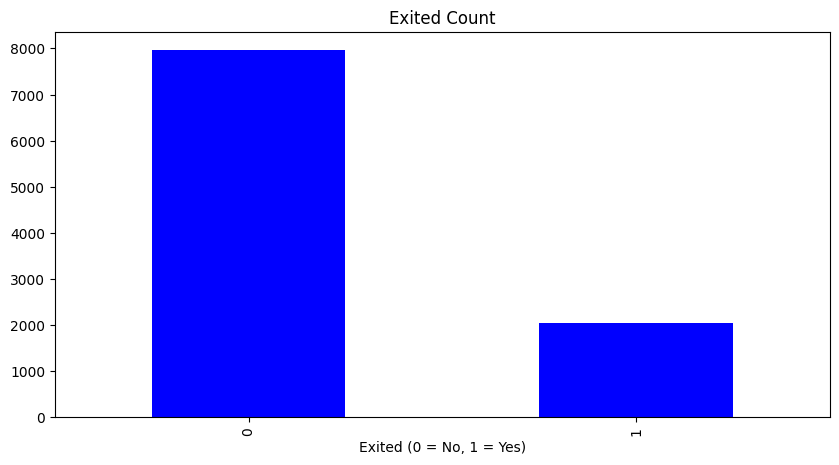

In [160]:
df['Exited'].value_counts().plot(kind='bar', figsize=(10, 5), color='Blue')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.title('Exited Count')
print('Exited (0 = No, 1 = Yes): \n', df['Exited'].value_counts())

Untuk data Exited label 0 menujukan nasabah Tidak keluar atau dikatakan nasabah bertahan, sedangkan untuk label 1 menunjukan bahwa nasabah akan Keluar atau Churn. Jika kita lihat dari data dan visualisasi di atas, Maka jumlah nasabah yang akan bertahan lebih banyak daripada yang akan Churn. 7963 untuk yang Bertahan berbanding dengan 2037 untuk yang akan Churn, Jumlah yang akan Churn tidak sampai 1/3 dari yang akan Bertahan Atau dalam data ini nilai Churn rate nya adalah 20.37%.

C:\Users\Nani Muksin\AppData\Local\Temp\ipykernel_15524\666644949.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


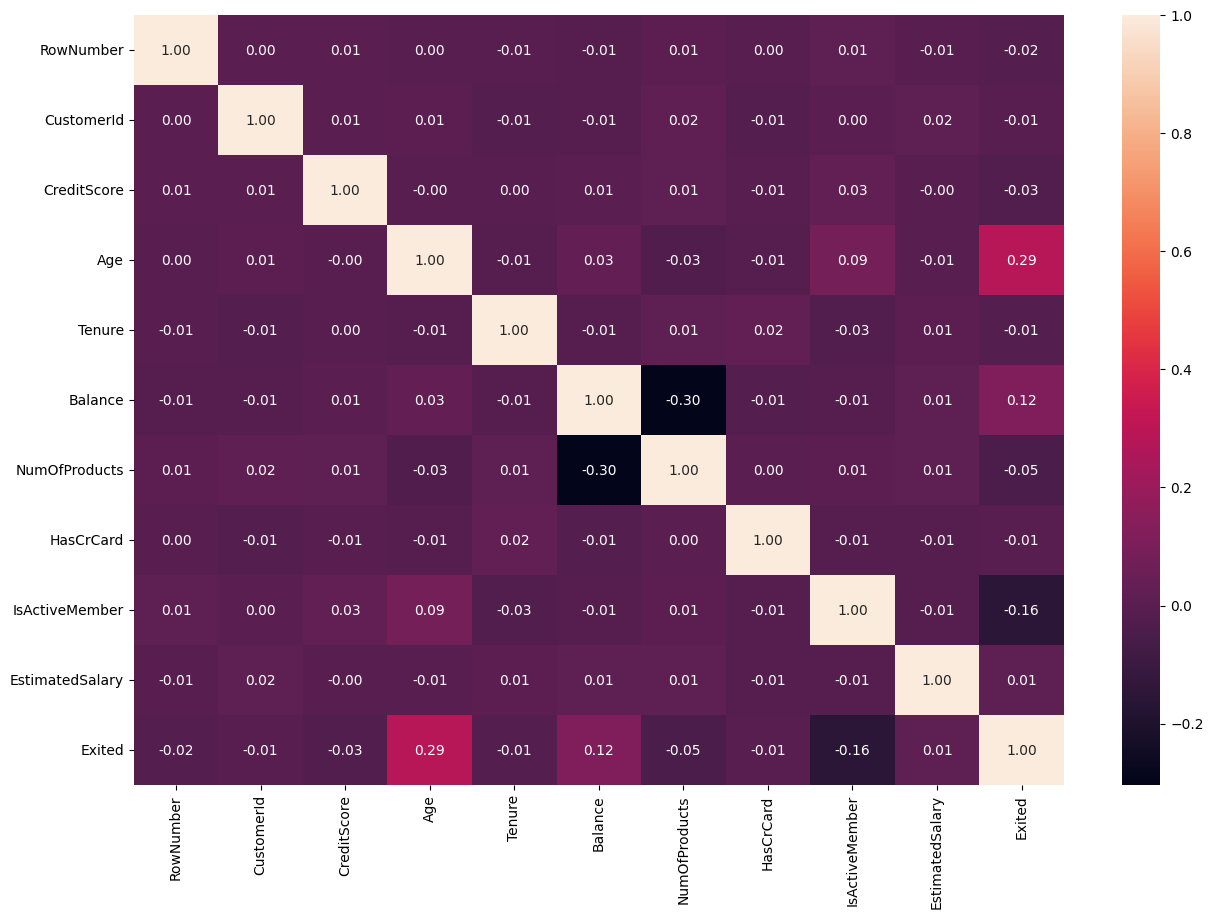

C:\Users\Nani Muksin\AppData\Local\Temp\ipykernel_15524\666644949.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().sort_values('Exited', ascending=False)


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Exited,-0.016571,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820


In [161]:
# Heatmap Correlation Matrix

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

df.corr().sort_values('Exited', ascending=False)

Dapat kita lihat Dari Nilai Korelasi Kolom numerikal dan visualisai heatmap di atas, Yang memiliki Korelasi positif Tertinggi adalah Kolom Age dan yang memiliki korelasi negatif Terendah adalah kolom IsActiveMember. Dan untuk Yang memiliki korelasi terendah adalah Kolom CUstomerId. Sleanjutnya untuk angka korelasi ini akan menjadi bahan pertimbangan dalam pemilihan Features.

# V. Feature engineering

## Split between 'X' (Features) and 'y' (Target)

In [162]:
# Splitting between 'X' and 'y'

X = dfc.drop(['Exited'], axis=1)
y = dfc['Exited']
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


Kita Akan melakukan split menjadi X yaitu train dan y yaitu target. untuk kolom *'Exited'* karena merupakan target akan kita drop dari X dan y hanya akan berisi *'Exited'* yang merupakan target.

## Split Between Train-Set and Test-Set

In [163]:
# Splitting between Train-set and Test-set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
X_train

Train Size :  (8000, 13)
Test Size :  (2000, 13)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6947,6948,15809558,Peppin,715,Spain,Male,31,7,0.00,1,1,1,149970.59
3245,3246,15768151,Romano,514,Germany,Female,45,3,109032.23,1,0,1,155407.21
8131,8132,15803352,Scott,613,Germany,Male,33,3,155736.42,2,1,1,57751.21
8681,8682,15746338,Onyekachukwu,565,France,Female,40,2,0.00,2,1,1,129956.13
2857,2858,15769829,Cheng,534,Spain,Male,51,3,0.00,2,0,1,20856.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,3743,15698031,Romano,587,Germany,Female,39,6,101851.80,2,1,0,7103.71
5109,5110,15576156,Abazu,710,Spain,Female,28,6,0.00,1,1,0,48426.98
3097,3098,15708228,Toscani,476,Germany,Male,30,3,134366.42,1,1,0,68343.53
9251,9252,15624013,Maxwell,541,France,Female,39,6,109844.81,1,1,0,25289.23


Melakukan split terhadap data train dan data test, dengan komposisi 0.2 atau 80/20% dari data frame.

## Handling missing value

In [164]:
dfc.shape

(10000, 14)

Diketahui DF ini memiliki 299 baris dan 13 kolom

In [165]:
dfc.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Dari data di atas diketahui bahwa tidak terdapat missing value pada data ini. Karena data ini sudah bersih dari missing value selanjutnya kita dapat langsung melakukan pengecekan dan handling pada outlier.

## Handling Outlier

In [166]:
X_train.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5006.217750,1.569075e+07,649.435125,38.907250,5.053750,76015.307723,1.536875,0.704000,0.516750,100070.539218
std,2890.921546,7.192288e+04,96.970565,10.471705,2.890702,62256.996118,0.586458,0.456519,0.499751,57349.911307
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,2516.750000,1.562829e+07,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51113.055000
50%,5009.500000,1.569071e+07,651.000000,37.000000,5.000000,96908.790000,1.000000,1.000000,1.000000,100487.720000
75%,7510.500000,1.575309e+07,717.000000,44.000000,8.000000,127271.890000,2.000000,1.000000,1.000000,148958.677500
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


> Analisis Sebelum Handling Outlier:

- RowNumber: Kolom ini hanya menunjukan jumlah baris keberapa data itu, dan tidak memiliki impact sama sekali pada target kita, selanjutnya saya akan mendrop kolom ini pada features selection, maka tidak perlu dilakukan handling outlier.

- CustomerId: Kolom ini hanya berisi nomor Customer id dan tidak memiliki pengaruh sama sekali kepada target kita, selanjutnya saya men drop kolom ini pada featyres selection, maka tidak perlu dilakukan handling outlier.

- CreditScore: Pada kolom ini nilai Min nya adalah 350 sedangkan nilai max nya adalah 850 dengan nilai mean nya adalah 650, Maka dapat saya simpulkan bahwa data ini wajar dan tidur perlu dilakukan handling outlier.

- Tenure : Nilai Min dari kolom ini adalah 0  dan nilai max nya adalah 10 Merupakan Nilai yang wajar untuk tenor cicilan. Maka dapat saya simpulkan data ini wajar dan tidak perlu dilakukan handling outlier.

- NumOfProducts: Kolom ini adalah informasi mengenai berapa banyak produk bank yang diikuti oleh nasabah tersebut, dan nilai maksimumnya adalah 4. Maka menurut saya adalah hal yang wajar dan tidak perlu dilakukan handling outlier.

- HasCrCard: Untuk Kolom ini Boolean yang bernilai 0 dan 1. maka tidak perlu saya lakukan handling outlier.

- IsActiveMember : Untuk Kolom ini Boolean yang bernilai 0 dan 1. maka tidak perlu saya lakukan handling outlier.

- Dan Untuk Kolom sisa yaitu kolom *"Age"*, *"Balance"*, *'EstimatedSalary'* akan saya lakukan pengecekan dan handling untuk outlier.


## Handling Outlier

In [167]:
# Fungsi untuk membuat histogram dan boxplot

def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Membuat fungsi untuk membuat histogram dan boxplot untuk melihat skew dan pesebaran outlier pada masing-masing kolom.

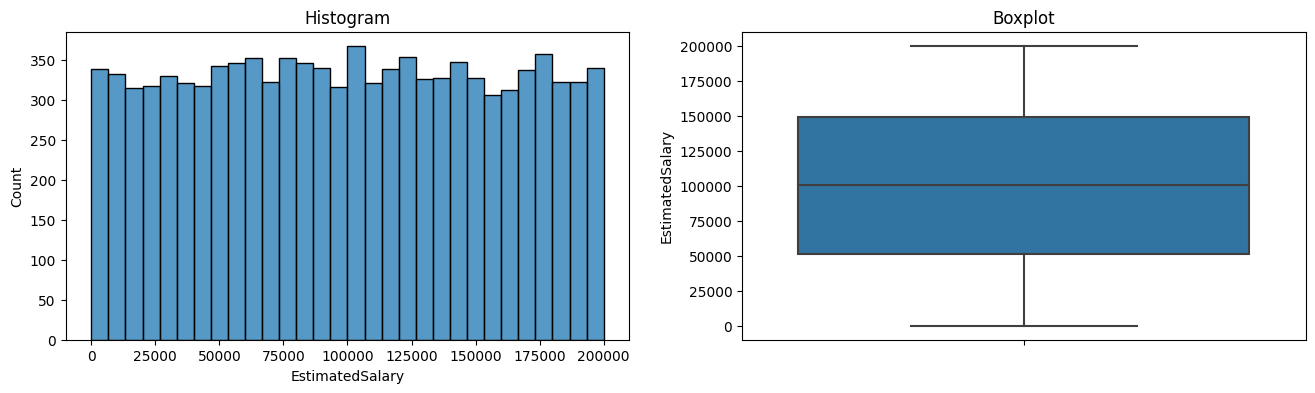


Skewness Value :  0.0020853576615585162


In [168]:
# cek skew age

diagnostic_plots(dfc, 'EstimatedSalary')
print('\nSkewness Value : ', dfc['EstimatedSalary'].skew())

Diketahui Untuk Kolom ini terdistribusi normal Dan tidak memiliki outlier, maka akan kita skip untuk handling outliernya.

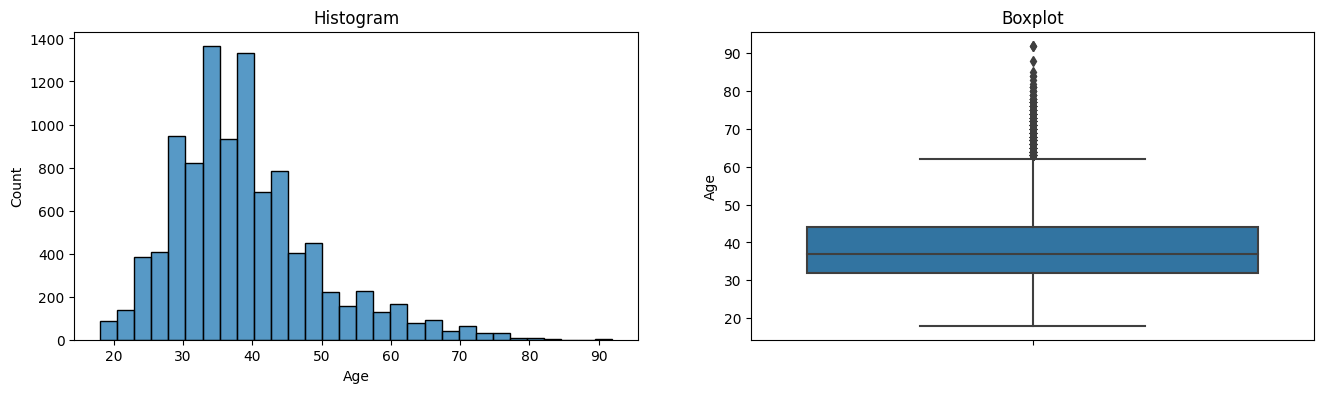


Skewness Value :  1.0113202630234552


In [169]:
# cek skew age

diagnostic_plots(dfc, 'Age')
print('\nSkewness Value : ', dfc['Age'].skew())

Data tidak terdistribusi normal dan memiliki outlier. Maka selanjutnya akan kita lakukan handling dengan motede IQR.

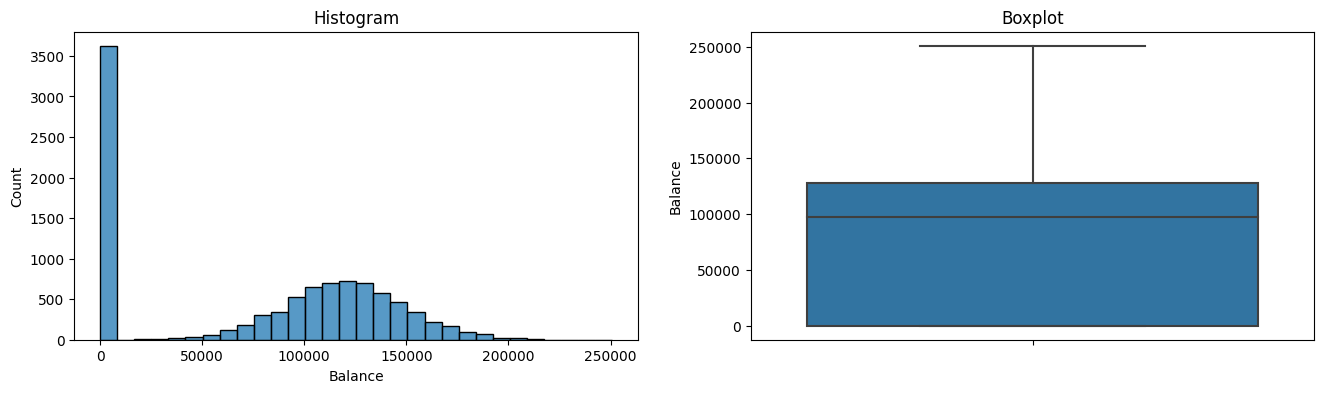


Skewness Value :  -0.14110871094154384


In [170]:
# cek skew Balance

diagnostic_plots(dfc, 'Balance')
print('\nSkewness Value : ', dfc['Balance'].skew())

Diketahui Untuk Kolom ini tidak terdistribusi normal Dan tidak memiliki outlier, maka akan kita skip untuk handling outliernya.

In [171]:
# Membuat fungsi untuk menentukan upper boundary dan lower boundary dari data yang kita handling outlienrya.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [172]:
# Limits for `Age`
age_upper_limit, age_lower_limit = find_skewed_boundaries(dfc, 'Age', 1.5)
age_upper_limit, age_lower_limit

print('age_upper_limit : ', age_upper_limit)
print('age_lower_limit : ', age_lower_limit)

age_upper_limit :  62.0
age_lower_limit :  14.0


Menggunakan Metode IQR karena datanya SKEW dengan * 1,5. maka didapat nilai upper limit dan lower limitnya:

- Limit_upper_limit :  62
- Limit_lower_limit :  14

In [173]:
# Flag the outliers in category `Age`
outliers_limit = np.where(X_train['Age'] > age_upper_limit, True,
                       np.where(X_train['Age'] < age_lower_limit, True, False))

print(outliers_limit[:10])

[False False False False False  True False False False False]


menunjukan bahwa terdapat outlier dari setiap kolom yang kita cari outliernya.

In [174]:
# Melakukan trimming pada dataset

X_train_trimmed = X_train.loc[~(outliers_limit)]
print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_trimmed.shape)

Size dataset - Before trimming :  (8000, 13)
Size dataset - After trimming  :  (7722, 13)


Dapat dilihat dari data di atas menunjukan Perbandingan X_train sebelum dan setelah dilakukan trimming, dari yang awalnya 8000 menjadi 7722, setelah kita lakukan trimming terhadap outlier. Berarti total data outlier yang dilakukan trimming adalah 278 data atau 3,4% dari total keseluruhan data. Walaupun jumlahnya tidak terlalu besar, tetapi saya merasa rugi karena kehilangan ratusan data, maka saya memutuskan untuk melakukan capping dibanding dengan winsorizer dibanding trimming sehingga tidak ada data yg hilang tetapi outliernya dapat dikendalikan.

In [175]:
# Melakukan metode capping menggunakan windsoriser() to mengatur sedemikian rupa sehingga nilai ekstrem pada 'X_skew' berada di nilai batas atasnya (IQR, fold 3, dipilih karena nilai skewnessnya > 1.0)

winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=3, 
                        variables=['Age'])

winsorizer.fit(X_train)

Winsorizer(capping_method='iqr', tail='both', variables=['Age'])

In [176]:
# Malakukan transformasi menggunakan winsorizer untuk nilai ekstrem tersebut pada X_skew

X_train = winsorizer.transform(X_train)

In [177]:
X_train.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5006.217750,1.569075e+07,649.435125,38.902750,5.053750,76015.307723,1.536875,0.704000,0.516750,100070.539218
std,2890.921546,7.192288e+04,96.970565,10.452426,2.890702,62256.996118,0.586458,0.456519,0.499751,57349.911307
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,2516.750000,1.562829e+07,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51113.055000
50%,5009.500000,1.569071e+07,651.000000,37.000000,5.000000,96908.790000,1.000000,1.000000,1.000000,100487.720000
75%,7510.500000,1.575309e+07,717.000000,44.000000,8.000000,127271.890000,2.000000,1.000000,1.000000,148958.677500
max,10000.000000,1.581569e+07,850.000000,80.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


X_train Setelah dilakukan capping, pada kolom Age menunjukan nilai max nya menjadi 80 yang tadinya 92, terlihat lebih masuk akal dan lebih bisa diterima dibanding data sebelumnya

## Handling Cardinality

In [178]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 6947 to 3545
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        8000 non-null   int64  
 1   CustomerId       8000 non-null   int64  
 2   Surname          8000 non-null   object 
 3   CreditScore      8000 non-null   int64  
 4   Geography        8000 non-null   object 
 5   Gender           8000 non-null   object 
 6   Age              8000 non-null   int64  
 7   Tenure           8000 non-null   int64  
 8   Balance          8000 non-null   float64
 9   NumOfProducts    8000 non-null   int64  
 10  HasCrCard        8000 non-null   int64  
 11  IsActiveMember   8000 non-null   int64  
 12  EstimatedSalary  8000 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 875.0+ KB


Dari data di atas, dapat kita lihat kolom-kolom yang ada pada data frame ini. Untuk pengecekan cardinality saya akan fokus pada kolom kategorikal seperti 'Geography' dan 'Gender'. Sedangkan untuk kolom 'HasCrCard', 'IsActiveMember' yang merupakan boolean tidak saya cek karena hanya bernilai 0 dan 1. Dan untuk kolom numerikal juga tidak akan saya cek.

In [179]:
# Let's inspect the cardinality, this is the number of different labels, for the different categorical variables

print('Number of categories in the variable Geography  : {}'.format(len(X_train.Geography.unique())))
print('Number of categories in the variable Gender     : {}'.format(len(X_train.Gender.unique())))



Number of categories in the variable Geography  : 3
Number of categories in the variable Gender     : 2


Setelah saya lakukan pengecekan Cardinality Untuk ke 3 kolom di atas, saya dapatkan informasi bahwa jumlah kategorinya masih dibilang sedikit pada masing-masing kolom yang paling banyak hanya ada 7. Jadi untuk selanjutnya saya tidak akan melakukan handling cardinality untuk mengurangi jumlah kategorinya, dan akan saya biarkan seperti data awal.

## Handling Duplicate

Saya melakukan pengecekan untuk mengatahui apakah terdapat data yg merupakan duplikat di dalam dataframe atau tidak.

In [180]:
dfc.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

Setelah dilakukan pengecekan pada DataFrame didaptkan bahwa pada dataframe ini tidak terdapat data yang merupakan data duplikat.

## Feature Selection

In [181]:
# memanggil X_train yg sudah dilakukan trimming

X_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6947,6948,15809558,Peppin,715,Spain,Male,31,7,0.00,1,1,1,149970.59
3245,3246,15768151,Romano,514,Germany,Female,45,3,109032.23,1,0,1,155407.21
8131,8132,15803352,Scott,613,Germany,Male,33,3,155736.42,2,1,1,57751.21
8681,8682,15746338,Onyekachukwu,565,France,Female,40,2,0.00,2,1,1,129956.13
2857,2858,15769829,Cheng,534,Spain,Male,51,3,0.00,2,0,1,20856.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,3743,15698031,Romano,587,Germany,Female,39,6,101851.80,2,1,0,7103.71
5109,5110,15576156,Abazu,710,Spain,Female,28,6,0.00,1,1,0,48426.98
3097,3098,15708228,Toscani,476,Germany,Male,30,3,134366.42,1,1,0,68343.53
9251,9252,15624013,Maxwell,541,France,Female,39,6,109844.81,1,1,0,25289.23


RowNumber	CustomerId	Surname	'CreditScore', 'Geography',	'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',	'IsActiveMember'	EstimatedSalary

In [182]:
X_train1 = X_train[['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',	'IsActiveMember']]
X_test1 = X_test[['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',	'IsActiveMember']]
X_train1

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
6947,715,Spain,31,7,0.00,1,1,1
3245,514,Germany,45,3,109032.23,1,0,1
8131,613,Germany,33,3,155736.42,2,1,1
8681,565,France,40,2,0.00,2,1,1
2857,534,Spain,51,3,0.00,2,0,1
...,...,...,...,...,...,...,...,...
3742,587,Germany,39,6,101851.80,2,1,0
5109,710,Spain,28,6,0.00,1,1,0
3097,476,Germany,30,3,134366.42,1,1,0
9251,541,France,39,6,109844.81,1,1,0


Berdasarkan personal judgement, saya membuang kolom kolom yang menurut saya tidak memiliki dampak seperti *'RowNumber'*	*'CustomerId'*	*'Surname*' karena kolom-kolom itu hanya berisi data informasi yang tidak memiliki korelasi apapun dengan target kita. Kemudian juga kolom *'Gender'* menurut personal judgement saya gender adalah equal dan tidak bisa dijadikan faktor sebgai orang akan churn atau tidak. Karena alasan itulah saya mendrop kolom-kolom tersebut.

## Split between numerical columns and categorical columns

In [183]:
# Mensplit kolom berdasarkan tipe datanya

num_columns = X_train1.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train1.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Cat Columns :  ['Geography']


Setelah di split berdasarkan tipe datanya maka didapatkan isi dari masing-masing kategori.

- kolom numerical  : 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'
- kolom Kategorikal: 'Geography'


In [184]:
X_train_num = X_train1[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]
X_test_num = X_test1[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]

X_train_cat = X_train1[['Geography']]
X_test_cat = X_test1[['Geography']]

X_train_num

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
6947,715,31,7,0.00,1,1,1
3245,514,45,3,109032.23,1,0,1
8131,613,33,3,155736.42,2,1,1
8681,565,40,2,0.00,2,1,1
2857,534,51,3,0.00,2,0,1
...,...,...,...,...,...,...,...
3742,587,39,6,101851.80,2,1,0
5109,710,28,6,0.00,1,1,0
3097,476,30,3,134366.42,1,1,0
9251,541,39,6,109844.81,1,1,0


## Pipeline ColumnTransformer

In [185]:
# Membuat pipeline preprocessing feature scaling

prep_pipeline = ColumnTransformer([
        ('mms_scaler', MinMaxScaler(), num_columns),
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_columns)
    ])

In [186]:
prep_pipeline

ColumnTransformer(transformers=[('mms_scaler', MinMaxScaler(),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'HasCrCard',
                                  'IsActiveMember']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Geography'])])

Membuat pipeline dengan ColumnTransformer

## Concate between Numerical Columns and Categorical Columns

In [187]:
# Menggabungkan kembali fitur yang telah dilakukan normalisasi dan encoding pada X_train & X_test ke dalam satu arrays

X_train_final = prep_pipeline.fit_transform(X_train)
X_test_final = prep_pipeline.transform(X_test)

c:\Users\Nani Muksin\miniconda3\envs\Hactiv8\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [188]:
cat_encoder = prep_pipeline.named_transformers_['cat']
enc_columns = list(cat_encoder.categories_[0])

In [189]:
# Mengubah bentuk `X_train_final` ke dalam dataframe

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns+enc_columns])
X_train_final_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,France,Germany,Spain
0,0.730,0.209677,0.7,0.000000,0.000000,1.0,1.0,0.0,0.0,1.0
1,0.328,0.435484,0.3,0.434568,0.000000,0.0,1.0,0.0,1.0,0.0
2,0.526,0.241935,0.3,0.620716,0.333333,1.0,1.0,0.0,1.0,0.0
3,0.430,0.354839,0.2,0.000000,0.333333,1.0,1.0,1.0,0.0,0.0
4,0.368,0.532258,0.3,0.000000,0.333333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
7995,0.474,0.338710,0.6,0.405949,0.333333,1.0,0.0,0.0,1.0,0.0
7996,0.720,0.161290,0.6,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0
7997,0.252,0.193548,0.3,0.535542,0.000000,1.0,0.0,0.0,1.0,0.0
7998,0.382,0.338710,0.6,0.437806,0.000000,1.0,0.0,1.0,0.0,0.0


# VI. Model Definition

In [190]:
# Medefinisikan baseline model yang akan dilakukan training

pipeline_lrc = Pipeline([('clf_lrc', LogisticRegression())
                        ])
pipeline_dtc = Pipeline([('clf_dtc', DecisionTreeClassifier())
                        ])
pipeline_rfc = Pipeline([('clf_rfc', RandomForestClassifier())
                        ])
pipeline_knn = Pipeline([('clf_knn', KNeighborsClassifier())
                        ])

In [191]:
log_model = pipeline_lrc.fit(X_train_final, y_train)
dc_model = pipeline_dtc.fit(X_train_final, y_train)
rf_model = pipeline_rfc.fit(X_train_final, y_train)
knn_model = pipeline_knn.fit(X_train_final, y_train)


Membuat base Model dengan Pipeline yang sudah kita buat, adapun Algortima yang digunakan pada project ini adalah:

- Logistic Regression
- Decision Tree
- Random Forest
- K-neirest Neighbor(KNN)

# VII. Model Training

## Baseline Model Training

Melakukan Model training untuk base model Pada masing-masing algoritma yang sudah kita buat.

In [192]:
# Train the Model Logistic Regression

log_model.fit(X_train_final, y_train)

Pipeline(steps=[('clf_lrc', LogisticRegression())])

In [193]:
# Train the Model Decision Tree

dc_model.fit(X_train_final, y_train)

Pipeline(steps=[('clf_dtc', DecisionTreeClassifier())])

In [194]:
# Train the Model Random Forest

rf_model.fit(X_train_final, y_train)

Pipeline(steps=[('clf_rfc', RandomForestClassifier())])

In [195]:
# Train the Model K-Nearest Neighbor

knn_model.fit(X_train_final, y_train)

Pipeline(steps=[('clf_knn', KNeighborsClassifier())])

# VIII. Model Evaluation

## Logistic Regression

In [196]:
y_pred_train = pipeline_lrc.predict(X_train_final)
y_pred_test = pipeline_lrc.predict(X_test_final)

In [197]:
pd.DataFrame({
    'actural':y_test,
    'pred':y_pred_test
}).T

,2144,3213,8532,5585,7967,9191,4865,7842,8605,8865,...,7009,8385,3858,6997,5068,3690,2737,9075,8799,6821
actural,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
pred,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Data di atas menunjukan perbandingan target actual dan target prediction dari setiap rownya. Dapat kita lihat pula apakah prediksi kita memiliki banyak perbedaan pada nilai actualnya atau tidak.

accuracy score train :  0.81375
accuracy score test :  0.801
recall - Train Set   :  0.19570552147239265 

classification_report train: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      6370
           1       0.64      0.20      0.30      1630

    accuracy                           0.81      8000
   macro avg       0.73      0.58      0.60      8000
weighted avg       0.79      0.81      0.77      8000

Confussion Matrix : 


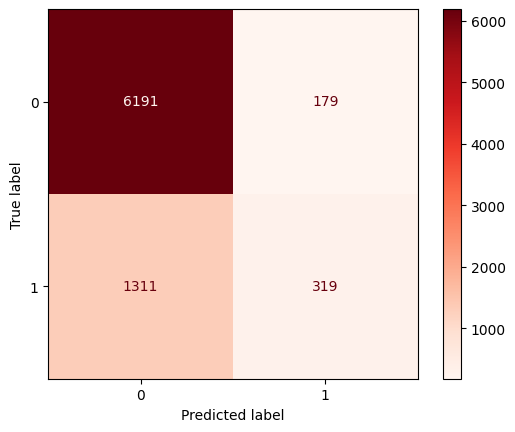

In [198]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

print('recall - Train Set   : ', recall_score(y_train, y_pred_train), '\n')
print('classification_report train: \n', classification_report(y_train,y_pred_train))
print('Confussion Matrix : \n',ConfusionMatrixDisplay.from_estimator(pipeline_lrc, X_train_final, y_train, cmap='Reds'))

> Dari Data di atas didapatkan Evaluasi Untuk Data Train pada Base Model Logistic Regression.

- Karena fokus kita pada Project ini adalah untuk menghindari False negatif(Orang yang di prediksi akan Bertahan tetapi Actualnya akan Churn) Maka Metrik evaluasion yang akan menjadi fokus kita adalah Recall

> Metrik Evaluasi:
- accuracy score train :  0.81
- accuracy score test  :  0.80
- recall - Train Set   :  0.19

> Confusion Matrix untuk data Train Logistic regression.
 - True Positif(TP) : Model memprediksi 319 nasabah akan Churn, dan aktualnya memang nasabah itu akan Churn.
 - True Negatif(TN) : Model memprediksi 6191 nasabah akan Bertahan, dan aktualnya memang nasabah itu akan Bertahan.
 - False Positif(FP) : Model memprediksi 179 nasabah akan Churn, tetapi aktualnya nasabah itu akan Bertahan.
 - False Negatif(FN) : Model memprediksi 1311 nasabah akan Bertahan, tetapi aktualnya nasabah itu akan Churn.

### Cross Validation Logistic Regression

In [199]:
# Cross Validation using `cross_val_score`

recall_score_train_cross_val = cross_val_score(log_model, 
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='recall')

print('Recall - All - Cross Validation  : ', recall_score_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_score_train_cross_val.mean())
print('Recall - Std - Cross Validation  : ', recall_score_train_cross_val.std())
print('Recall - Range of Test-Set       : ', (recall_score_train_cross_val.mean()-recall_score_train_cross_val.std()) , '-', (recall_score_train_cross_val.mean()+recall_score_train_cross_val.std()))

Recall - All - Cross Validation  :  [0.20257827 0.18933824 0.18600368]
Recall Score - Mean - Cross Validation :  0.19264006247066046
Recall - Std - Cross Validation  :  0.007158015054179048
Recall - Range of Test-Set       :  0.18548204741648142 - 0.1997980775248395


Dari Hasil Cross Validation diatas dapat kita lihat nilai Recall yang sudah di cross validation, untuk model Logistic Regression ini memiliki nilai Recall Score - Mean - Cross Validation :  0.19264006247066046. Nilai yang bisa dibilang kurang baik karena sangat jauh dibawah 75%.

Recall - Test Set   :  0.18181818181818182 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.96      0.88      1593
           1       0.53      0.18      0.27       407

    accuracy                           0.80      2000
   macro avg       0.68      0.57      0.58      2000
weighted avg       0.76      0.80      0.76      2000
 

Confusion Matrix      : 


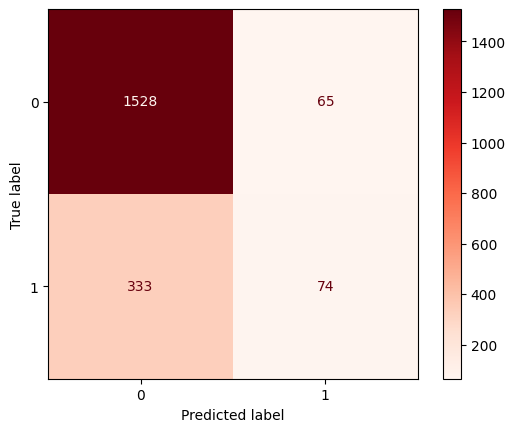

In [200]:
# Check Performance Model against Test-Set

y_log_test = log_model.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(log_model, X_test_final, y_test, cmap='Reds'))

> Dari Data di atas didapatkan Evaluasi Untuk Data Test pada Base Model Logistic Regression.

- Karena fokus kita pada Project ini adalah untuk menghindari False negatif(Orang yang di prediksi akan Bertahan tetapi Actualnya akan Churn) Maka Metrik evaluasion yang akan menjadi fokus kita adalah Recall

> Metrik Evaluasi:
- recall - Test Set   :  0.18181818181818182

> Confusion Matrix untuk data Train Logistic regression.
 - True Positif(TP) : Model memprediksi 74 nasabah akan Churn, dan aktualnya memang nasabah itu akan Churn.
 - True Negatif(TN) : Model memprediksi 1528 nasabah akan Bertahan, dan aktualnya memang nasabah itu akan Bertahan.
 - False Positif(FP) : Model memprediksi 65 nasabah akan Churn, tetapi aktualnya nasabah itu akan Bertahan.
 - False Negatif(FN) : Model memprediksi 333 nasabah akan Bertahan, tetapi aktualnya nasabah itu akan Churn.

## Decision Tree

In [226]:
y_dc_train = pipeline_dtc.predict(X_train_final)
y_dc_test = pipeline_dtc.predict(X_test_final)


In [202]:
pd.DataFrame({
    'actural':y_test,
    'pred':y_dc_test
}).T

,2144,3213,8532,5585,7967,9191,4865,7842,8605,8865,...,7009,8385,3858,6997,5068,3690,2737,9075,8799,6821
actural,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
pred,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Data di atas menunjukan perbandingan target actual dan target prediction dari setiap rownya. Dapat kita lihat pula apakah prediksi kita memiliki banyak perbedaan pada nilai actualnya atau tidak.

accuracy score train :  1.0
accuracy score test :  0.7975
recall - Train Set   :  1.0 

classification_report train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Confussion Matrix : 


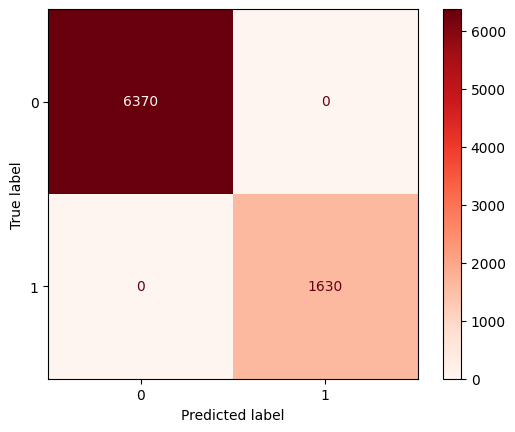

In [203]:
print('accuracy score train : ',accuracy_score(y_train,y_dc_train))
print('accuracy score test : ',accuracy_score(y_test,y_dc_test))

print('recall - Train Set   : ', recall_score(y_train, y_dc_train), '\n')
print('classification_report train: \n', classification_report(y_train,y_dc_train))
print('Confussion Matrix : \n',ConfusionMatrixDisplay.from_estimator(pipeline_dtc, X_train_final, y_train, cmap='Reds'))

> Dari Data di atas didapatkan Evaluasi Untuk Data Train pada Base Model Decision Tree.

- Karena fokus kita pada Project ini adalah untuk menghindari False negatif(Orang yang di prediksi akan Bertahan tetapi Actualnya akan Churn) Maka Metrik evaluasion yang akan menjadi fokus kita adalah Recall

> Metrik Evaluasi:
- accuracy score train :  1.0
- accuracy score test  :  0.79
- recall - Train Set   :  1.0

> Confusion Matrix untuk data Train Decision Tree.
 - True Positif(TP) : Model memprediksi 1630 nasabah akan Churn, dan aktualnya memang nasabah itu akan Churn.
 - True Negatif(TN) : Model memprediksi 6370 nasabah akan Bertahan, dan aktualnya memang nasabah itu akan Bertahan.
 - False Positif(FP) : Model memprediksi 0 nasabah akan Churn, tetapi aktualnya nasabah itu akan Bertahan.
 - False Negatif(FN) : Model memprediksi 0 nasabah akan Bertahan, tetapi aktualnya nasabah itu akan Churn.

### Cross Validation Decision Tree

In [204]:
# Cross Validation using `cross_val_score`

recall_score_train_cross_val1 = cross_val_score(dc_model, 
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='recall')

print('Recall - All - Cross Validation  : ', recall_score_train_cross_val1)
print('Recall Score - Mean - Cross Validation : ', recall_score_train_cross_val1.mean())
print('Recall - Std - Cross Validation  : ', recall_score_train_cross_val1.std())
print('Recall - Range of Test-Set       : ', (recall_score_train_cross_val1.mean()-recall_score_train_cross_val1.std()) , '-', (recall_score_train_cross_val1.mean()+recall_score_train_cross_val1.std()))

Recall - All - Cross Validation  :  [0.51197053 0.53676471 0.53038674]
Recall Score - Mean - Cross Validation :  0.5263739934279421
Recall - Std - Cross Validation  :  0.010512352805130649
Recall - Range of Test-Set       :  0.5158616406228115 - 0.5368863462330727


Dari Hasil Cross Validation diatas dapat kita lihat nilai Recall yang sudah di cross validation, untuk model Decision Tree ini memiliki nilai Recall Score - Mean - Cross Validation : 0.5263739934279421. Nilai yang bisa dibilang kurang baik karena sangat jauh dibawah 75%.

Recall - Test Set   :  0.5085995085995086 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1593
           1       0.50      0.51      0.51       407

    accuracy                           0.80      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.80      0.80      0.80      2000
 

Confusion Matrix      : 


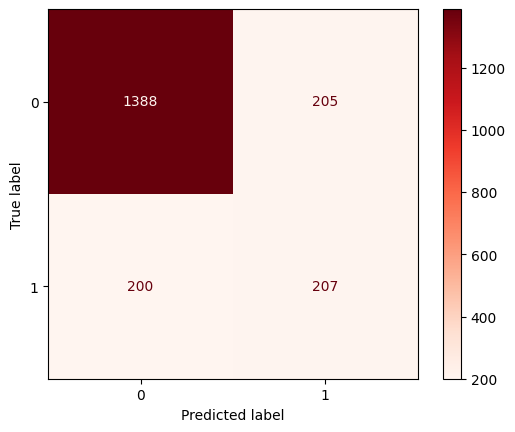

In [205]:
# Check Performance Model against Test-Set

y_dc_test = dc_model.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test, y_dc_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_dc_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dc_model, X_test_final, y_test, cmap='Reds'))

> Dari Data di atas didapatkan Evaluasi Untuk Data Test pada Base Model Decision Tree.

- Karena fokus kita pada Project ini adalah untuk menghindari False negatif(Orang yang di prediksi akan Bertahan tetapi Actualnya akan Churn) Maka Metrik evaluasion yang akan menjadi fokus kita adalah Recall

> Metrik Evaluasi:
- recall - Test Set   :  0.50

> Confusion Matrix untuk data Test Decision Tree.
 - True Positif(TP) : Model memprediksi 207 nasabah akan Churn, dan aktualnya memang nasabah itu akan Churn.
 - True Negatif(TN) : Model memprediksi 1388 nasabah akan Bertahan, dan aktualnya memang nasabah itu akan Bertahan.
 - False Positif(FP) : Model memprediksi 205 nasabah akan Churn, tetapi aktualnya nasabah itu akan Bertahan.
 - False Negatif(FN) : Model memprediksi 200 nasabah akan Bertahan, tetapi aktualnya nasabah itu akan Churn.

## Random Forest

In [227]:
y_rf_train = pipeline_rfc.predict(X_train_final)
y_rf_test = pipeline_rfc.predict(X_test_final)

In [207]:
pd.DataFrame({
    'actural':y_test,
    'pred':y_rf_test
}).T

,2144,3213,8532,5585,7967,9191,4865,7842,8605,8865,...,7009,8385,3858,6997,5068,3690,2737,9075,8799,6821
actural,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
pred,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Data di atas menunjukan perbandingan target actual dan target prediction dari setiap rownya. Dapat kita lihat pula apakah prediksi kita memiliki banyak perbedaan pada nilai actualnya atau tidak.

accuracy score train :  0.999875
accuracy score test :  0.856
recall - Train Set   :  0.9993865030674847 

classification_report train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Confussion Matrix : 


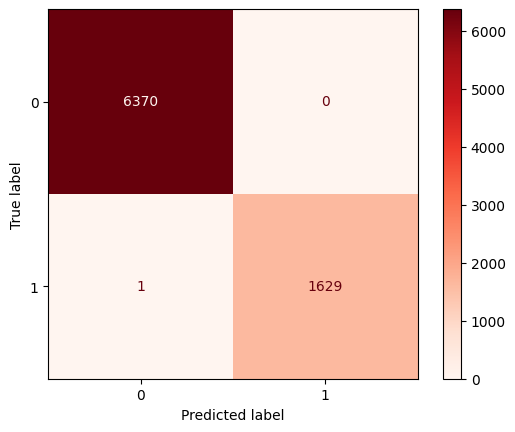

In [208]:
print('accuracy score train : ',accuracy_score(y_train,y_rf_train))
print('accuracy score test : ',accuracy_score(y_test,y_rf_test))

print('recall - Train Set   : ', recall_score(y_train, y_rf_train), '\n')
print('classification_report train: \n', classification_report(y_train,y_rf_train))
print('Confussion Matrix : \n',ConfusionMatrixDisplay.from_estimator(pipeline_rfc, X_train_final, y_train, cmap='Reds'))

> Dari Data di atas didapatkan Evaluasi Untuk Data Train pada Base Model Random Forest.

- Karena fokus kita pada Project ini adalah untuk menghindari False negatif(Orang yang di prediksi akan Bertahan tetapi Actualnya akan Churn) Maka Metrik evaluasion yang akan menjadi fokus kita adalah Recall

> Metrik Evaluasi:
- accuracy score train :  0.99
- accuracy score test  :  0.85
- recall - Train Set   :  0.99

> Confusion Matrix untuk data Train Random Forest.
 - True Positif(TP) : Model memprediksi 1629 nasabah akan Churn, dan aktualnya memang nasabah itu akan Churn.
 - True Negatif(TN) : Model memprediksi 6370 nasabah akan Bertahan, dan aktualnya memang nasabah itu akan Bertahan.
 - False Positif(FP) : Model memprediksi 0 nasabah akan Churn, tetapi aktualnya nasabah itu akan Bertahan.
 - False Negatif(FN) : Model memprediksi 1 nasabah akan Bertahan, tetapi aktualnya nasabah itu akan Churn.

### Cross Validation Random Forest

In [209]:
# Cross Validation using `cross_val_score`

recall_score_train_cross_val2 = cross_val_score(rf_model, 
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='recall')

print('Recall - All - Cross Validation  : ', recall_score_train_cross_val2)
print('Recall Score - Mean - Cross Validation : ', recall_score_train_cross_val2.mean())
print('Recall - Std - Cross Validation  : ', recall_score_train_cross_val2.std())
print('Recall - Range of Test-Set       : ', (recall_score_train_cross_val2.mean()-recall_score_train_cross_val2.std()) , '-', (recall_score_train_cross_val2.mean()+recall_score_train_cross_val2.std()))

Recall - All - Cross Validation  :  [0.47882136 0.49632353 0.50092081]
Recall Score - Mean - Cross Validation :  0.4920219008413678
Recall - Std - Cross Validation  :  0.009521008397999867
Recall - Range of Test-Set       :  0.48250089244336797 - 0.5015429092393677


Dari Hasil Cross Validation diatas dapat kita lihat nilai Recall yang sudah di cross validation, untuk model Random Forest ini memiliki nilai Recall Score - Mean - Cross Validation :  0.4920219008413678. Nilai yang bisa dibilang kurang baik karena sangat jauh dibawah 75%.

Recall - Test Set   :  0.47911547911547914 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.72      0.48      0.58       407

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.74      2000
weighted avg       0.85      0.86      0.84      2000
 

Confusion Matrix      : 


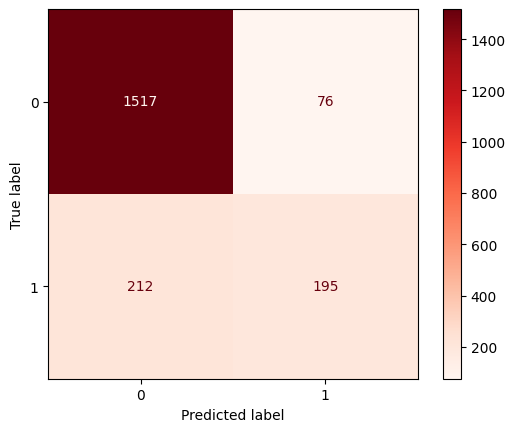

In [210]:
# Check Performance Model against Test-Set

y_rf_test = rf_model.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test, y_rf_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_rf_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_model, X_test_final, y_test, cmap='Reds'))

> Dari Data di atas didapatkan Evaluasi Untuk Data Test pada Base Model Random Forest.

- Karena fokus kita pada Project ini adalah untuk menghindari False negatif(Orang yang di prediksi akan Bertahan tetapi Actualnya akan Churn) Maka Metrik evaluasion yang akan menjadi fokus kita adalah Recall

> Metrik Evaluasi:
- recall - Test Set   :  0.47911547911547914 

> Confusion Matrix untuk data Test Random Forest.
 - True Positif(TP) : Model memprediksi 195 nasabah akan Churn, dan aktualnya memang nasabah itu akan Churn.
 - True Negatif(TN) : Model memprediksi 1517 nasabah akan Bertahan, dan aktualnya memang nasabah itu akan Bertahan.
 - False Positif(FP) : Model memprediksi 76 nasabah akan Churn, tetapi aktualnya nasabah itu akan Bertahan.
 - False Negatif(FN) : Model memprediksi 212 nasabah akan Bertahan, tetapi aktualnya nasabah itu akan Churn.

## K-Nearest Neighbor

In [228]:
y_knn_train = pipeline_knn.predict(X_train_final)
y_knn_test = pipeline_knn.predict(X_test_final)

In [212]:
pd.DataFrame({
    'actural':y_test,
    'pred':y_knn_test
}).T

,2144,3213,8532,5585,7967,9191,4865,7842,8605,8865,...,7009,8385,3858,6997,5068,3690,2737,9075,8799,6821
actural,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
pred,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Data di atas menunjukan perbandingan target actual dan target prediction dari setiap rownya. Dapat kita lihat pula apakah prediksi kita memiliki banyak perbedaan pada nilai actualnya atau tidak.

accuracy score train :  0.87925
accuracy score test :  0.84
recall - Train Set   :  0.5435582822085889 

classification_report train: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      6370
           1       0.80      0.54      0.65      1630

    accuracy                           0.88      8000
   macro avg       0.85      0.75      0.79      8000
weighted avg       0.87      0.88      0.87      8000

Confussion Matrix : 


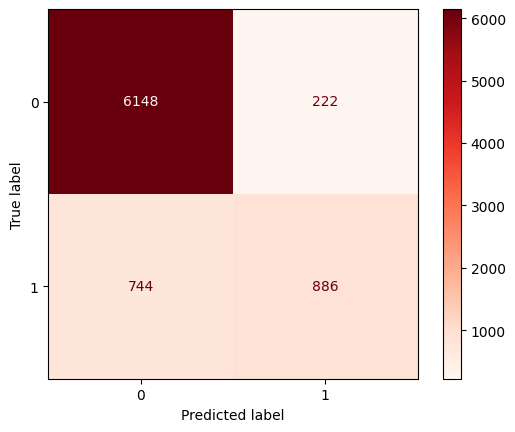

In [229]:
print('accuracy score train : ',accuracy_score(y_train,y_knn_train))
print('accuracy score test : ',accuracy_score(y_test,y_knn_test))

print('recall - Train Set   : ', recall_score(y_train, y_knn_train), '\n')
print('classification_report train: \n', classification_report(y_train,y_knn_train))
print('Confussion Matrix : \n',ConfusionMatrixDisplay.from_estimator(pipeline_knn, X_train_final, y_train, cmap='Reds'))

> Dari Data di atas didapatkan Evaluasi Untuk Data Train pada Base Model KNN.

- Karena fokus kita pada Project ini adalah untuk menghindari False negatif(Orang yang di prediksi akan Bertahan tetapi Actualnya akan Churn) Maka Metrik evaluasion yang akan menjadi fokus kita adalah Recall

> Metrik Evaluasi:
- accuracy score train :  0.87
- accuracy score test  :  0.84
- recall - Train Set   :  0.54

> Confusion Matrix untuk data Train KNN.
 - True Positif(TP) : Model memprediksi 886 nasabah akan Churn, dan aktualnya memang nasabah itu akan Churn.
 - True Negatif(TN) : Model memprediksi 6148 nasabah akan Bertahan, dan aktualnya memang nasabah itu akan Bertahan.
 - False Positif(FP) : Model memprediksi 222 nasabah akan Churn, tetapi aktualnya nasabah itu akan Bertahan.
 - False Negatif(FN) : Model memprediksi 744 nasabah akan Bertahan, tetapi aktualnya nasabah itu akan Churn.

### Cross Validation KNN

In [214]:
# Cross Validation using `cross_val_score`

recall_score_train_cross_val3 = cross_val_score(knn_model, 
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='recall')

print('Recall - All - Cross Validation  : ', recall_score_train_cross_val3)
print('Recall Score - Mean - Cross Validation : ', recall_score_train_cross_val3.mean())
print('Recall - Std - Cross Validation  : ', recall_score_train_cross_val3.std())
print('Recall - Range of Test-Set       : ', (recall_score_train_cross_val3.mean()-recall_score_train_cross_val3.std()) , '-', (recall_score_train_cross_val3.mean()+recall_score_train_cross_val3.std()))

Recall - All - Cross Validation  :  [0.37753223 0.36397059 0.36095764]
Recall Score - Mean - Cross Validation :  0.3674868197739501
Recall - Std - Cross Validation  :  0.0072088896704482
Recall - Range of Test-Set       :  0.3602779301035019 - 0.3746957094443983


Dari Hasil Cross Validation diatas dapat kita lihat nilai Recall yang sudah di cross validation, untuk model KNN ini memiliki nilai Recall Score - Mean - Cross Validation : 0.3674868197739501 Nilai yang bisa dibilang kurang baik karena sangat jauh dibawah 75%.

Recall - Test Set   :  0.4520884520884521 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1593
           1       0.65      0.45      0.53       407

    accuracy                           0.84      2000
   macro avg       0.76      0.70      0.72      2000
weighted avg       0.83      0.84      0.83      2000
 

Confusion Matrix      : 


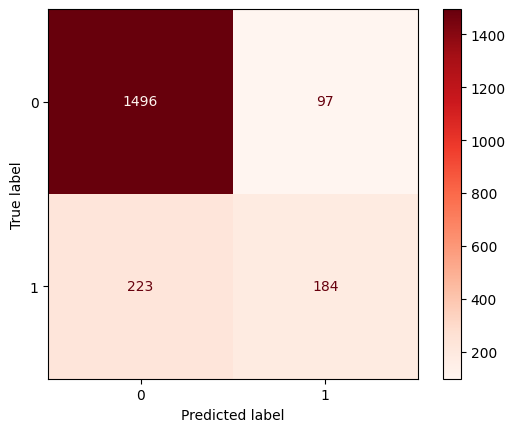

In [215]:
# Check Performance Model against Test-Set

y_knn_test = knn_model.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test, y_knn_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_knn_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_model, X_test_final, y_test, cmap='Reds'))

> Dari Data di atas didapatkan Evaluasi Untuk Data Test pada Base Model KNN.

- Karena fokus kita pada Project ini adalah untuk menghindari False negatif(Orang yang di prediksi akan Bertahan tetapi Actualnya akan Churn) Maka Metrik evaluasion yang akan menjadi fokus kita adalah Recall

> Metrik Evaluasi:
- recall - Test Set   :  0.4520884520884521 

> Confusion Matrix untuk data Test pada base model KNN.
 - True Positif(TP) : Model memprediksi 184 nasabah akan Churn, dan aktualnya memang nasabah itu akan Churn.
 - True Negatif(TN) : Model memprediksi 1496 nasabah akan Bertahan, dan aktualnya memang nasabah itu akan Bertahan.
 - False Positif(FP) : Model memprediksi 97 nasabah akan Churn, tetapi aktualnya nasabah itu akan Bertahan.
 - False Negatif(FN) : Model memprediksi 223 nasabah akan Bertahan, tetapi aktualnya nasabah itu akan Churn.

## Mencari model terbaik

In [216]:
# Save Classification Report into a Dictionary

model_reports = {}
score_model = {
    'Recall Score Logistic Regression : ': recall_score_train_cross_val.mean(),
    'Recall Score Decision Tree       : ': recall_score_train_cross_val1.mean(),
    'Recall Score Random Forest       : ': recall_score_train_cross_val2.mean(),
    'Recall Score KNN                 : ': recall_score_train_cross_val3.mean(),
}
model_reports['Recall Score - Mean - Cross Validation'] = score_model
pd.DataFrame(model_reports)

,Recall Score - Mean - Cross Validation
Recall Score Decision Tree :,0.526374
Recall Score KNN :,0.367487
Recall Score Logistic Regression :,0.192640
Recall Score Random Forest :,0.492022


> Model Terbaik dari 4 algoritma:

- Karena Target Kita adalah untuk melakukan prediksi apakah Nasabah akan Beratahan atau akan churn. Maka dari itu fokus kita adalah pada false Negatif atau Nasabah yang di prediksi akan bertahan tetapi kenyataanya akan churn. Karena akan fatal jika Nasabah di prediksi akan bertahan ternyata kenyataanya dia tidak akan churn, perusahaan dapat kehilangan nasabahnya. 

- Maka dari itu karna fokus kita adalah false Negatif maka Metric Evaluation yang akan saya gunakan adalah Recall score. Mengapa tidak menggunakan accuracy score atau precision score? Karena data yang kita gunakan tidak balance jumlah yang churn tidak sampai 1/3 yang bertahan, kemudian precision score baik digunakan jika kita ingin mendeteksi false positif, oleh karena itu kedua metric tersebut akan tidak representatif hasilnya jika kita gunakan untuk tujuan kita yaitu memprediksi false Negatif

- Dan Dari 4 Base Model yang saya buat sudah saya lakukan cross validation di tiap modelnya untuk menemukan Mean Recall Score Terbaik, Didapatkan bahwa base model terbaik jatuh pada algoritma Decision Tree yang mendapat nilai Recall Score - Mean - Cross Validation 0.52. yang selanjutnya dari model terbaik tersebut akan kita lakukan hyperparameter tuning untuk mencoba mengimprove score tersebut.



## Hyperparameter tuning

In [217]:
## Hyperparameter tuning

In [218]:
grid_params = dict(
    clf_dtc__max_depth = [2, 4, 6],
    clf_dtc__min_samples_split = [2, 5, 10],
    clf_dtc__min_samples_leaf = [1, 2, 4],
    clf_dtc__criterion = ['gini', 'entropy']
)

Decisiontree_Grid_CV = GridSearchCV(dc_model,
                           grid_params,
                           verbose = 3,
                           refit = True,
                           scoring = 'precision',
                           cv = 5,
                           return_train_score = True,
                           n_jobs = -1)

Decisiontree_Grid_CV.fit(X_train_final, y_train.values.ravel())

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf_dtc', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'clf_dtc__criterion': ['gini', 'entropy'],
                         'clf_dtc__max_depth': [2, 4, 6],
                         'clf_dtc__min_samples_leaf': [1, 2, 4],
                         'clf_dtc__min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='precision', verbose=3)

Mencari Parameter terbaik untuk proses tuning dengan menggunakan metode grid search yang selanjutnya akan kita cari estimator, parameter dan index terbaik. yang akan kita terapkan pada model yang dilakukan proses hyperparameter tuning.

In [219]:
# Get Best Hyperparameters

print(Decisiontree_Grid_CV.best_estimator_)
print(Decisiontree_Grid_CV.best_params_)
print(Decisiontree_Grid_CV.best_index_)

Decisiontree_hyperparam_df = pd.DataFrame(Decisiontree_Grid_CV.cv_results_)
Decisiontree_hyperparam_df.sort_values("mean_test_score", ascending=False)\
[["params", "mean_test_score", "mean_train_score", "std_test_score", "std_train_score",'rank_test_score','mean_score_time']].head()

Pipeline(steps=[('clf_dtc',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4))])
{'clf_dtc__criterion': 'entropy', 'clf_dtc__max_depth': 4, 'clf_dtc__min_samples_leaf': 1, 'clf_dtc__min_samples_split': 2}
36


,params,mean_test_score,mean_train_score,std_test_score,std_train_score,rank_test_score,mean_score_time
37,"{'clf_dtc__criterion': 'entropy', 'clf_dtc__ma...",0.82854,0.841007,0.071896,0.06157,1,0.003716
38,"{'clf_dtc__criterion': 'entropy', 'clf_dtc__ma...",0.82854,0.841007,0.071896,0.06157,1,0.003420
39,"{'clf_dtc__criterion': 'entropy', 'clf_dtc__ma...",0.82854,0.841007,0.071896,0.06157,1,0.003849
40,"{'clf_dtc__criterion': 'entropy', 'clf_dtc__ma...",0.82854,0.841007,0.071896,0.06157,1,0.003327
41,"{'clf_dtc__criterion': 'entropy', 'clf_dtc__ma...",0.82854,0.841007,0.071896,0.06157,1,0.004028


Dari data di atas dapat kita lihat best estimator, best parameter dan best index, dari hasil proses pencarian menggunakan grid search.

In [220]:
# Get Best Estimator

Decisiontree_Grid_CV_best = Decisiontree_Grid_CV.best_estimator_

In [221]:
y_dc_tuning_train = Decisiontree_Grid_CV_best.predict(X_train_final)
y_dc_tuning_test = Decisiontree_Grid_CV_best.predict(X_test_final)

Melakukan predict dengan model logistic regression yang sudah dilakukan proses hyperparameter tuning.

accuracy score train :  0.848125
accuracy score test :  0.8415
Recall Score - Train Set   :  0.3104294478527607 

classification_report train: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      6370
           1       0.85      0.31      0.45      1630

    accuracy                           0.85      8000
   macro avg       0.85      0.65      0.68      8000
weighted avg       0.85      0.85      0.82      8000

Confussion Matrix : 


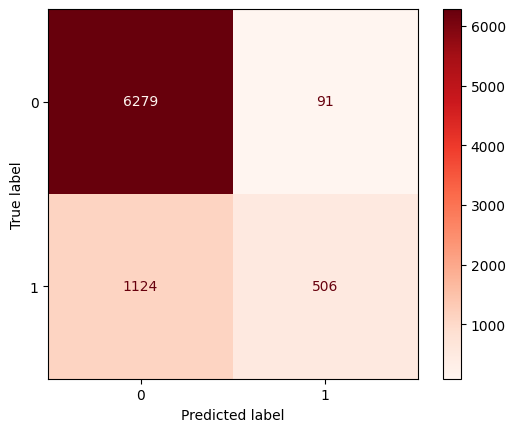

In [222]:
print('accuracy score train : ',accuracy_score(y_train,y_dc_tuning_train))
print('accuracy score test : ',accuracy_score(y_test,y_dc_tuning_test))
print('Recall Score - Train Set   : ', recall_score(y_train, y_dc_tuning_train), '\n')
print('classification_report train: \n', classification_report(y_train,y_dc_tuning_train))
print('Confussion Matrix : \n',ConfusionMatrixDisplay.from_estimator(Decisiontree_Grid_CV_best, X_train_final, y_train, cmap='Reds'))

> Dari Data di atas didapatkan Evaluasi Untuk Data Train pada Tuned Model Decision Tree.

- Karena fokus kita pada Project ini adalah untuk menghindari False negatif(Orang yang di prediksi akan Bertahan tetapi Actualnya akan Churn) Maka Metrik evaluasion yang akan menjadi fokus kita adalah Recall

> Metrik Evaluasi:
- accuracy score train :  0.84
- accuracy score test  :  0.84
- recall - Train Set   :  0.31

> Confusion Matrix untuk data Train tuned model Decision Tree.
 - True Positif(TP) : Model memprediksi 506 nasabah akan Churn, dan aktualnya memang nasabah itu akan Churn.
 - True Negatif(TN) : Model memprediksi 6279 nasabah akan Bertahan, dan aktualnya memang nasabah itu akan Bertahan.
 - False Positif(FP) : Model memprediksi 91 nasabah akan Churn, tetapi aktualnya nasabah itu akan Bertahan.
 - False Negatif(FN) : Model memprediksi 1124 nasabah akan Bertahan, tetapi aktualnya nasabah itu akan Churn.

Recall Score - Test Set   :  0.26535626535626533 

Training score: 0.8481
Test score: 0.8415 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1593
           1       0.86      0.27      0.41       407

    accuracy                           0.84      2000
   macro avg       0.85      0.63      0.66      2000
weighted avg       0.84      0.84      0.81      2000
 

Confusion Matrix      : 


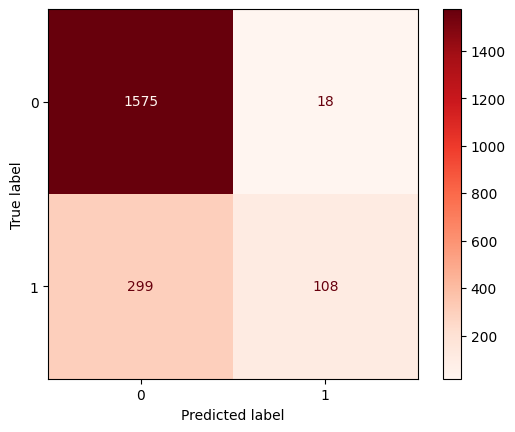

In [223]:
# Check Performance Model against Test-Set Hyperparametertuning model

y_dc_tuning_test = Decisiontree_Grid_CV_best.predict(X_test_final)

print('Recall Score - Test Set   : ', recall_score(y_test, y_dc_tuning_test), '\n')
print('Training score: {:.4f}'.format(Decisiontree_Grid_CV_best.score(X_train_final, y_train)))
print('Test score: {:.4f}'.format(Decisiontree_Grid_CV_best.score(X_test_final, y_test)), '\n')
print('Classification Report : \n', classification_report(y_test, y_dc_tuning_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(Decisiontree_Grid_CV_best, X_test_final, y_test, cmap='Reds'))

> Dari Data di atas didapatkan Evaluasi Untuk Data Test pada Tuned Model Decision Tree.

- Karena fokus kita pada Project ini adalah untuk menghindari False negatif(Orang yang di prediksi akan Bertahan tetapi Actualnya akan Churn) Maka Metrik evaluasion yang akan menjadi fokus kita adalah Recall

> Metrik Evaluasi:
- accuracy score train :  0.84
- accuracy score test  :  0.84
- recall - Train Set   :  0.26

> Confusion Matrix untuk data Test tuned model Decision Tree.
 - True Positif(TP) : Model memprediksi 108 nasabah akan Churn, dan aktualnya memang nasabah itu akan Churn.
 - True Negatif(TN) : Model memprediksi 1575 nasabah akan Bertahan, dan aktualnya memang nasabah itu akan Bertahan.
 - False Positif(FP) : Model memprediksi 18 nasabah akan Churn, tetapi aktualnya nasabah itu akan Bertahan.
 - False Negatif(FN) : Model memprediksi 299 nasabah akan Bertahan, tetapi aktualnya nasabah itu akan Churn.

## Model Analysis

In [224]:
# Save Classification Report into a Dictionary

model_reports = {}
dc_reports = {
    'train - precision' : precision_score(y_train, y_dc_train),
    'train - recall' : recall_score(y_train, y_dc_train),
    'train - accuracy' : accuracy_score(y_train, y_dc_train),
    'train - f1_score' : f1_score(y_train, y_dc_train),
    'test - precision' : precision_score(y_test, y_dc_test),
    'test - recall' : recall_score(y_test, y_dc_test),
    'test - accuracy_score' : accuracy_score(y_test, y_dc_test),
    'test - f1_score' : f1_score(y_test, y_dc_test),
}

tuning_dc_model = {
    'train - precision' : precision_score(y_train, y_dc_tuning_train),
    'train - recall' : recall_score(y_train, y_dc_tuning_train),
    'train - accuracy' : accuracy_score(y_train, y_dc_tuning_train),
    'train - f1_score' : f1_score(y_train, y_dc_tuning_train),
    'test - precision' : precision_score(y_test, y_dc_tuning_test),
    'test - recall' : recall_score(y_test, y_dc_tuning_test),
    'test - accuracy_score' : accuracy_score(y_test, y_dc_tuning_test),
    'test - f1_score' : f1_score(y_test, y_dc_tuning_test),
}
model_reports['Logistic Regression (BaseModel)'] = dc_reports
model_reports['Logistic Regression (Tuned)'] = tuning_dc_model
pd.DataFrame(model_reports)

,Logistic Regression (BaseModel),Logistic Regression (Tuned)
train - precision,1.000000,0.847571
train - recall,1.000000,0.310429
train - accuracy,1.000000,0.848125
train - f1_score,1.000000,0.454423
test - precision,0.502427,0.857143
test - recall,0.508600,0.265356
test - accuracy_score,0.797500,0.841500
test - f1_score,0.505495,0.405253


> Best Model from base model and tuned model.

- Dari Data di atas dapat lihat perbandingan hasil skor dari base model Decision Tree yang sudah saya buat dengan model Decision Tree yang sudah dilakukan hyperparamter tuning, dan hasilnya justru menunjukan Penurunan dari nilai Recall nya untuk recall train dari 1.0 menjadi 0.31 dan recall test dari 0.5 menjadi 0.26, Jika kita lihat untuk precision dan accuracy score justru mengalami peningkatan di data test nya, tetapi karena fokus kita adalah pada false Negatif maka metric yang menjadi fokus kita ada Recall. Maka dari itu saya ambil kesimpulan bahwa model terbaik ada base model dari decision Tree. 

- Base model Decision Tree ini juga dapat dikatakan sebagai model yang Overfit karena memiliki nilai Recall Train 1.0 Tetapi nilai Recall testnya hanya 0.5 terdapat selisih yang sangat jauh pada kedua nilai tersebut, yang mengakibatkan model ini Overfit

- Dan juga Karena yang ingin kita hindari adalah false Negatif atau nasabah yang diprediksi akan bertahan tetapi kenyataanya akan churn maka dapat kita lihat data perbandingan dari confusion matrix. untuk data train dan data test dari base model Decision Tree memiliki jumlah false positif 0 pada data train dan 200 pada data test, jumlahnya lebih kecil dibanding jumlah false positif pada model logistic regression yg sudah di tunning yg memiliki false positif 1124 pada data train dan 299 pada data test. Maka dapat disimpulkan karena jumlah false negatifnya lebih kecil Base model Decision Tree masih lebih baik dari tuned model decision tree jika dilihat dari confusion Matrix.



> Kelebihan dari Best Model:

- Karna tujuan kita adalah memperkecil false negatif, dilihat dari confusion matrix nya model ini memiliki jumlah false negatif yang tidak terlalu banyak, pada data test hanya ada 202/2000 data atau sekitar 10% dari data.

> Kekurangan Dari Best Model:

- Modelnya Overfit dapat kita lihat dari nilai recall train yang nilainya 1.0 atau dapat dikatakan sempurna tetapi hasil recall test nya hanya 0.5 atau setengah dari nilai recall trainya, maka dapat dikatakan model itu overfit dan tidak terlalu baik.

## False Negative Analysis

In [232]:
false_negative = (y_dc_test == 0) & (y_test == 1)
data_false_negative = X_test[false_negative]

Membuat Dataframe khusus untuk data yang merupakan false positive

In [235]:
data_false_negative.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8532,8533,15780805,Lu,585,France,Female,35,2,0.00,2,1,0,98621.04
2239,2240,15648577,Pickering,493,France,Female,31,3,0.00,1,1,1,176570.28
1082,1083,15663438,Andrejew,688,Spain,Male,36,0,89772.30,1,1,0,177383.68
8390,8391,15755521,Ma,660,France,Female,48,0,90044.32,2,0,1,187604.97
1110,1111,15592229,Mullan,713,France,Female,52,0,185891.54,1,1,1,46369.57
8870,8871,15789560,Clark,668,France,Male,42,8,187534.79,1,1,1,32900.41
2477,2478,15760294,Endrizzi,512,France,Female,41,8,145150.28,1,1,0,64869.32
3879,3880,15757541,Rickard,778,France,Female,33,9,151772.63,2,0,0,180249.94
1306,1307,15709117,Fanucci,823,Spain,Female,46,3,81576.75,1,1,1,28370.95
8600,8601,15755405,Hudson,710,France,Male,43,9,128284.45,1,1,0,32996.89


In [236]:
data_false_negative.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7483,7484,15784526,Chen,616,France,Male,44,5,102016.38,1,0,1,178235.37
6600,6601,15697360,Yudina,505,France,Female,36,2,79951.90,1,0,1,174123.16
5385,5386,15681410,Korff,813,Germany,Female,36,6,98088.09,1,0,1,26687.22
8876,8877,15712807,Robertson,556,Spain,Male,46,3,131764.96,1,1,1,108500.66
4033,4034,15569079,Hagins,632,Germany,Male,48,6,126066.26,1,1,0,64345.61
53,54,15702298,Parkhill,655,Germany,Male,41,8,125561.97,1,0,0,164040.94
9218,9219,15806318,Wright,676,Germany,Female,48,2,124442.38,1,1,0,15068.53
218,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04
9075,9076,15635942,Thomson,576,France,Male,40,9,0.00,2,1,0,112465.19
6821,6822,15704209,Noble,802,France,Female,39,7,120145.96,2,0,1,59497.01


Untuk Karakteristik Dari data yang merupakan false Negative sendiri cenderung bervariasi, tetapi jika kita analisa Dari 20 sampel data di atas mayoritas mereka berasal dari negara France, kemudian untuk usianya rata-rata nasabah tersebut berada di usia 30-50 tahun. Dan NumOfProducts	nya adalah 1 dan 2. Dari Hasil analisa data false Negatif ini dapat digunakan untuk di analisa kembali secara lebih dalam sehingga Pihak Bank Indo dapat mempelajari karakteristik dari nasabah yang memiliki kecenderungan untuk false positif sehingga di kemudia hari nilai false positif bisa semakin diperkecil.

## Combining Pipelines

In [225]:
# Mendefinisikan pipeline model terbaik untuk saving

pipelines = Pipeline([('prepp', prep_pipeline),
                      ('model', dc_model)
                     ])
pipelines.fit(X_train, y_train)

c:\Users\Nani Muksin\miniconda3\envs\Hactiv8\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('prepp',
                 ColumnTransformer(transformers=[('mms_scaler', MinMaxScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography'])])),
                ('model',
                 Pipeline(steps=[('clf_dtc', DecisionTreeClassifier())]))])

# IX. Model Saving

> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [231]:
# Saving files 

with open('pipelines.pkl', 'wb') as file_1:
  pickle.dump(pipelines, file_1)

with open('num_columns.txt', 'w') as file_2:
  json.dump(num_columns, file_2)

with open('cat_columns.txt', 'w') as file_3:
  json.dump(cat_columns, file_3)

with open('enc_columns.txt', 'w') as file_4:
  json.dump(enc_columns, file_4)

# X. Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

# XI. Pengambilan Kesimpulan

> Berdasarkan EDA: 

-  Dari bagian EDA saya mencari distribusi data untuk masing-masing kolom, dan hasilnya adalah hanya kolom *"EstimatedSalary"* dan kolom *"Tenure"* yang terdistribusi dengan normal, sedangkan untuk 4 kolom lainya yaitu *"CreditScore"*, *"Age"*, *"Balance"*, *"NumOfProducts"* Tidak terdistribusi dengan normal dan Menujukan datanya Skew.
- Kemudian saya mencari hubungan kolom boolean dengan target kita dan didapatkan infromasi bahwa Semakin sedikit Produk yang diikuti oleh nasabah maka kecenderungan untuk Churn nya semakin tinggi. 
- Kemudian Untuk Nasabah yang memiliki kredit card memiliki kecenderungan Untuk Churn Dibanding nasabah yang tidak memiliki credit Card. 
- Kemudian dapat kita lihat juga Untuk nasabah yang merupakan aktif member memiliki kemungkinan untuk Churn yang lebih kecil dibanding nasabah yang bukan merupakan aktif member. Maka dapat disimpulkan untuk Nasabah yang merupakan member aktif product dari bank memiliki kecenderungan untuk churn Lebih kecil dibanding yang bukan member program dari bank, dan semakin banyak product program dari bank yg diikuti oleh nasabah semakin memperkecil kemungkinan nasabah untuk Churn.
- Kemudian dapat kita lihat persebaran data untuk umur terhadap balance, Maka dapat kita lihat bahwa untuk Balance dari balance min 0 sampai di kisaran 200000 tersebar pada seluruh usia, dan untuk balance max sendiri 250000 ada pada nasabah dengan usia sekitar 38 Tahun. Maka dari hasil analisa di atas dapat kita lihat bahwa usia tidak mempengaruhi Balance dari Credit card nasabah tersebut.
- Dari EDA juga kita dapatkan informasi dari 3 negara asal nasabah merupakan setara dalam hal estimated salary rata-ratanya. 
- Dan dari hasil pengecekan korelasi di ketahui yang memiliki Korelasi positif Tertinggi adalah Kolom Age dan yang memiliki korelasi negatif Terendah adalah kolom IsActiveMember. Dan untuk Yang memiliki korelasi terendah adalah Kolom CUstomerId

> Berdasarkan Model:

- Berdasarkan Recall score mean cross validation dari tiap Model yang sudah saya buat didapatkan Model terbaik adalah Decision Tree.
- kemudian Dari model terbaik tersebut saya lakukan hyperparameter tuning dengan harapan untuk meningkatkan performanya tetapi hasilnya justru base model dari Decision Tree lebih baik daripada model Decision Tree yang sudah dilakukan tuning. jadi saya tetap menggunakan base model yang sudah saya buat. 
- Untuk Base model Decision Tree ini juga dapat dikatakan sebagai model yang Overfit karena memiliki nilai Recall Train 1.0 Tetapi nilai Recall testnya hanya 0.5 terdapat selisih yang sangat jauh pada kedua nilai tersebut, yang mengakibatkan model ini Overfit
- Hasil Dari confusion Matrix menunjukan pada model decision Tree, Untuk data train nya memiliki jumlah false negatif sebanyak 0/8000 atau 0% dari keseluruhan data train, dan pada data test terdapat 200/2000 data false negatif atau 10% dari keseluruhan data test.

> Implementasi bisnis: 

- Jika Menerapkan Model ini pada bisnis Bank Indo maka mereka dapat menggunakan prediksi untuk melakukan perlakuan yang berbeda terhadap setiap nasabah hasil prediksi, sebagai contoh:
    1. Untuk nasabah yang di prediksi akan Bertahan dapat diikutkan pada program loyality dan dari nilai loyality tersebut dapat ditukarkan dnegan hadiah sehingga nasabah akan menjadi lebih loyal terhadap perusahaan.
    2. Untuk nasabah yang di prediksi akan Churn perusahaan dapat merangkul nasabah dan menanyakan peningkatan pelayan apa yang dibutuhkan untuk membuat nasabah merasa lebih puas, nasabah juga dapat diberikan banyak promo, seperti Bunga tabungan yang tinggi, bunga pinjaman yang lebih rendah, discount pada merchant jika menggunakan kartu debit/credit dari pihak bank. Dengan harapan nasabah akan terus melanjutkan untuk menjadi nasbah pada Bank Indo.

> Further Improvement: 

- Untuk pengembangan kedepanya mungkin bisa ditingkatkan lagi untuk metrik evaluation score nya, dengan cara menseleksi fitur dengan lebih ketat dan lebih cermat.
- Kemudia dapat dicoba beberapa algoritma lain seperti Gradien Boosting, Naive Bayes, SVM dan lainya, karena ada kemungkinan adanya algoritma yang dapat bekerja dengan lebih baik.
- Mencoba ragam dari parameter pada hyperparameter tuning, mungkin saja bisa meningkatkan performansi dari model ini.